In [143]:
import pandas as pd
import numpy as np

In [144]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                   sep=', ', names=['age', 'workclass', 'fnlwgt', 'education',
                                  'education-num', 'marital-status', 'occupation',
                                  'relationship', 'race', 'sex', 'capital-gain', 
                                  'capital-loss', 'hours-per-week', 'native-country', 
                                    'income_year'], engine='python')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [145]:
#1. How many males and females are there?
data.groupby('sex').size()

sex
Female    10771
Male      21790
dtype: int64

In [146]:
# 2. What is the mean male age?
data[data['sex'] == 'Male']['age'].mean()

39.43354749885268

In [147]:
# 3. What is the proportion of the US citizens?
data[data['native-country'] == 'United-States'].shape[0]/data.shape[0]

0.895857006848684

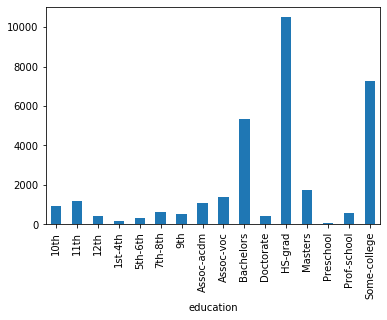

In [148]:
# 4. Plot the distribution of people’s education as a bar plot.
gh = data.groupby('education')['education'].size()
gh.plot.bar( x = 'education')

In [149]:
# 5. What is the mean and standard deviation of the ”final weight” for divorced people?
print("standart deviation - ", data[data['marital-status'] == 'Divorced']['fnlwgt'].std(),
      "  mean deviation - ", data[data['marital-status'] == 'Divorced']['fnlwgt'].mean())

standart deviation -  105646.78945933603   mean deviation -  185802.79045689848


In [150]:
# 6. Is it true that the people who receive over 50k are mostly highly educated?
df = data[data['income_year'] == '>50K'].groupby('education').size()
print(df['Bachelors'] + df['Doctorate'] + df['Masters'], df.sum() / 2)
if (df['Bachelors'] + df['Doctorate'] + df['Masters']) > (df.sum() / 2):
    print("True")
else:
    print("False")

3486 3920.5
False


In [151]:
# 7. What is the maximum male and female age for each race?
data.groupby(['race','sex'])['age'].max()

race                sex   
Amer-Indian-Eskimo  Female    80
                    Male      82
Asian-Pac-Islander  Female    75
                    Male      90
Black               Female    90
                    Male      90
Other               Female    74
                    Male      77
White               Female    90
                    Male      90
Name: age, dtype: int64

In [152]:
# 8. The people from which countries work as farmers/fishers?
data[data['occupation']  == 'Farming-fishing']['native-country'].value_counts()

United-States    879
Mexico            77
?                  5
Puerto-Rico        5
Philippines        4
Guatemala          4
Cuba               2
Italy              2
Canada             2
El-Salvador        2
Vietnam            2
Germany            1
Cambodia           1
Poland             1
Japan              1
Ireland            1
Yugoslavia         1
England            1
France             1
Hong               1
Portugal           1
Name: native-country, dtype: int64

In [153]:
# 9. Consider the ratio of the number of 
# 1) male bachelors to male masters, and 
# 2) female bachelors to female masters. Which one is higher?
fg = data.groupby(['sex', 'education']).size()
if (fg['Male']['Bachelors']/ fg['Male']['Masters']) > (fg['Female']['Bachelors']/ fg['Female']['Masters']):
    print("The ratio of the number of male bachelors to male masters is higher than \
ratio of the number of female bachelors to female masters ")
else:
    print("The ratio of the number of female bachelors to female masters is higher than \
ratio of the number of male bachelors to male masters ")

The ratio of the number of male bachelors to male masters is higher than ratio of the number of female bachelors to female masters 


In [154]:
# 10. What is the largest number of hours a person works a week? 
# How many people who work this number of hours are there? 
# What is their income?
data[data['hours-per-week'] == data['hours-per-week'].max()][['hours-per-week','income_year']]

,hours-per-week,income_year
935,99,>50K
1172,99,>50K
1887,99,>50K
3578,99,>50K
4086,99,<=50K
4308,99,<=50K
4441,99,>50K
5376,99,<=50K
5432,99,<=50K
6618,99,<=50K
